In [1]:
!! cd

['C:\\Users\\nagal\\demo\\diabetes']

In [3]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Search for best parameters using Gridsearch and RandomforestRegressor

In [4]:
train = pd.read_csv("final_train.csv")
train.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,InsulinLog
176,6,85,78,23,31,31.2,0.382,42,0,3.433987
355,9,165,88,23,31,30.4,0.302,49,1,3.433987
82,7,83,78,26,71,29.3,0.767,36,0,4.262680
253,0,86,68,32,31,35.8,0.238,25,0,3.433987
190,3,111,62,23,31,22.6,0.142,21,0,3.433987


In [5]:
# CREATE X and y
y = train["Outcome"]
X = train.drop(columns = ["Outcome"])

In [6]:
X.shape

(768, 9)

In [7]:
y.shape

(768,)

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
model = RandomForestRegressor()
params_grid = [{"n_estimators" : [10, 20, 30, 40, 50], "max_depth" : [2, 3, 4, 5]}]

In [18]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3, 4, 5],
                          'n_estimators': [10, 20, 30, 40, 50]}])

In [19]:
# DISPLAY SCORES
results = grid_search.cv_results_
for score,param in zip(results["mean_test_score"], results["params"]):
    print(score,param)

0.2438891711803767 {'max_depth': 2, 'n_estimators': 10}
0.2420827445821402 {'max_depth': 2, 'n_estimators': 20}
0.24410409218366347 {'max_depth': 2, 'n_estimators': 30}
0.24601491207693274 {'max_depth': 2, 'n_estimators': 40}
0.24883469876693928 {'max_depth': 2, 'n_estimators': 50}
0.27125998479238544 {'max_depth': 3, 'n_estimators': 10}
0.25601598801751796 {'max_depth': 3, 'n_estimators': 20}
0.2808052792711012 {'max_depth': 3, 'n_estimators': 30}
0.2817430342928097 {'max_depth': 3, 'n_estimators': 40}
0.273923728490833 {'max_depth': 3, 'n_estimators': 50}
0.27477439105382123 {'max_depth': 4, 'n_estimators': 10}
0.2847927193595656 {'max_depth': 4, 'n_estimators': 20}
0.295471949228268 {'max_depth': 4, 'n_estimators': 30}
0.2798129750065691 {'max_depth': 4, 'n_estimators': 40}
0.2795521726860242 {'max_depth': 4, 'n_estimators': 50}
0.27547157331624933 {'max_depth': 5, 'n_estimators': 10}
0.25521632128383526 {'max_depth': 5, 'n_estimators': 20}
0.2816286135551618 {'max_depth': 5, 'n_est

In [20]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 30}

In [21]:
grid_search.best_score_

0.295471949228268

# Build model with best estimator

In [22]:
model = grid_search.best_estimator_

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, r2_score, mean_squared_error

In [25]:
r2_score(y_test, y_pred)

0.3316143944637989

In [26]:
mse = mean_squared_error(y_test, y_pred)

In [27]:
mse

0.14173179331428384

In [28]:
np.sqrt(mse)

0.37647283210649324

<AxesSubplot:ylabel='Outcome'>

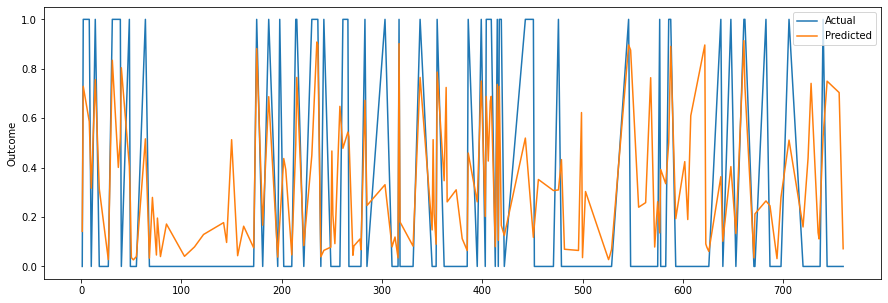

In [36]:
# COMPARE ACTUAL AND PREDICTED VALUES USING LINEGRAPH
plt.gcf().set_size_inches(15,5)
sns.lineplot(x = X_test.index, y = y_test, label = "Actual")
sns.lineplot(x = X_test.index, y = y_pred, label = "Predicted")